In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from loaders import *
import math
import random
from attn_masked import parse_timeloop_stats, aggregate_timeloop_runs
import os
import json

In [8]:
opt_mapping_config = {
    "matrix_size_M_dim": 2048,
    "matrix_size_K_dim": 2048,
    "matrix_size_N_dim": 2048,
    "DRAM_factor_M": 128,
    "DRAM_factor_N": 16,
    "DRAM_factor_K": 64,
    "DRAM_permutation": [
      "K",
      "M",
      "N"
    ],
    "ClusterArray_factor_M": 2,
    "ClusterArray_factor_N": 8,
    "ClusterArray_factor_K": 1,
    "ClusterArray_permutation": [
      "N",
      "M",
      "K"
    ],
    "PE_Cluster_factor_M": 4,
    "PE_Cluster_factor_N": 1,
    "PE_Cluster_factor_K": 4,
    "PE_Cluster_permutation": [
      "K",
      "M",
      "N"
    ],
    "iact_spad_factor_M": 1,
    "iact_spad_factor_N": 1,
    "iact_spad_factor_K": 2,
    "iact_spad_permutation": [
      "K",
      "M",
      "N"
    ],
    "weight_spad_factor_M": 1,
    "weight_spad_factor_N": 1,
    "weight_spad_factor_K": 4,
    "weight_spad_permutation": [
      "K",
      "N",
      "M"
    ],
    "psum_factor_M": 2,
    "psum_factor_N": 16,
    "psum_factor_K": 1,
    "psum_permutation": [
      "K",
      "N",
      "M"
    ],
    "reg_factor_M": 1,
    "reg_factor_N": 1,
    "reg_factor_K": 1,
    "reg_permutation": [
      "N",
      "K",
      "M"
    ],
    "density_weights": 1,
    "density_inputs": 1,
    "pe_meshX": 4,
    "pe_meshY": 4
  }

In [5]:
def evaluate_config(config, sparse_opt=None):
    if sparse_opt == None:
        sparse_opt = 'designs/baseline/baseline_sparse_opt.yaml'

    out = run_timeloop_model(
        config,
        problem='designs/baseline/baseline_problem.yaml',
        mapping='designs/baseline/baseline_mapping.yaml',
        sparse_optimizations=sparse_opt, 
    )
    stats = open('./output_dir/timeloop-model.stats.txt', 'r').read()
    return stats


def do_problem(config, sparsities = [0.5, 0.001, 1.0]): 
    q1_config, q2_config, q4_config = config.copy(), config.copy(), config.copy()
    q1_config['density_inputs'] = sparsities[0]
    q2_config['density_inputs'] = sparsities[1]
    q4_config['density_inputs'] = sparsities[2]

    q1_stats = evaluate_config(q1_config)
    q2_stats = evaluate_config(q2_config)
    q4_stats = evaluate_config(q4_config)
    
    all_stats = [q1_stats, q2_stats, q1_stats, q4_stats]
    
    parsed_runs = [parse_timeloop_stats(stats) for stats in all_stats]
    combined_stats = aggregate_timeloop_runs(parsed_runs)

    # curr_opt = {}
    # for attr in attributes: 
    #     if attr in ['total_energy_uJ', 'computes_per_cycle']:
    #         val = combined_stats[attr]
    #     elif attr == 'utilization_percent': 
    #         val = combined_stats[attr]['overall']
    #     elif attr == 'memory_traffic': 
    #         val = sum(combined_stats[attr].values())
    #     else: 
    #         raise ValueError(f"{attr} not a valid attribute.")

    #     curr_opt[attr] = val
                
    return combined_stats

In [6]:
attn_stats = do_problem(opt_mapping_config)
baseline_dense_stats = do_problem(opt_mapping_config, sparsities=[1.0, 1.0, 1.0])
baseline_50p_sparse_stats = do_problem(opt_mapping_config, sparsities=[0.5, 0.5, 0.5])

[INFO] 2025-05-04 23:38:22,397 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-05-04 23:38:25,476 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-05-04 23:38:28,573 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-05-04 23:38:31,664 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-05-04 23:38:34,652 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-05-04 23:38:37,694 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-05-04 23:38:40,754 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-05-04 23:38:43,781 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


[INFO] 2025-05-04 23:38:46,812 - pytimeloop.accelergy_interface - Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


INFO:pytimeloop.accelergy_interface:Running Accelergy with command: accelergy /home/workspace/final_project/output_dir/parsed-processed-input.yaml -o ./output_dir/ -v


In [11]:
print(f"{attn_stats=}, {baseline_dense_stats=}, {baseline_50p_sparse_stats=}")

attn_stats={'total_energy_uJ': 446798.72000000003, 'memory_energy_pJ': defaultdict(<class 'float'>, {'MAC': 267703375394.77, 'reg': 381186524.1700001, 'psum_spad': 9872029610.58, 'weight_spad': 21503389919.86, 'iact_spad': 231611048.93, 'DRAM': 137438953472.0}), 'memory_traffic': defaultdict(<class 'int'>, {'reg': 18262737813, 'psum_spad': 68652367872, 'weight_spad': 51539607552, 'iact_spad': 3238405341, 'DRAM': 2432696320}), 'energy_per_compute_fJ': {'MAC': 15574.6, 'reg': 22.18, 'psum_spad': 574.34, 'weight_spad': 1251.0472606768942, 'iact_spad': 13.48, 'DRAM': 8558.47077515809, 'Total': 25994.108040832485}, 'utilization_percent': {'MAC': 256.0, 'overall': 100.0}, 'computes_per_cycle': 255.99999784041145, 'total_actual_computes': 17188459119, 'total_cycles': 67142419}, baseline_dense_stats={'total_energy_uJ': 741297.4, 'memory_energy_pJ': defaultdict(<class 'float'>, {'MAC': 535139181186.24, 'reg': 761992052.32, 'psum_spad': 19734192132.72, 'weight_spad': 29506064546.28, 'iact_spad':

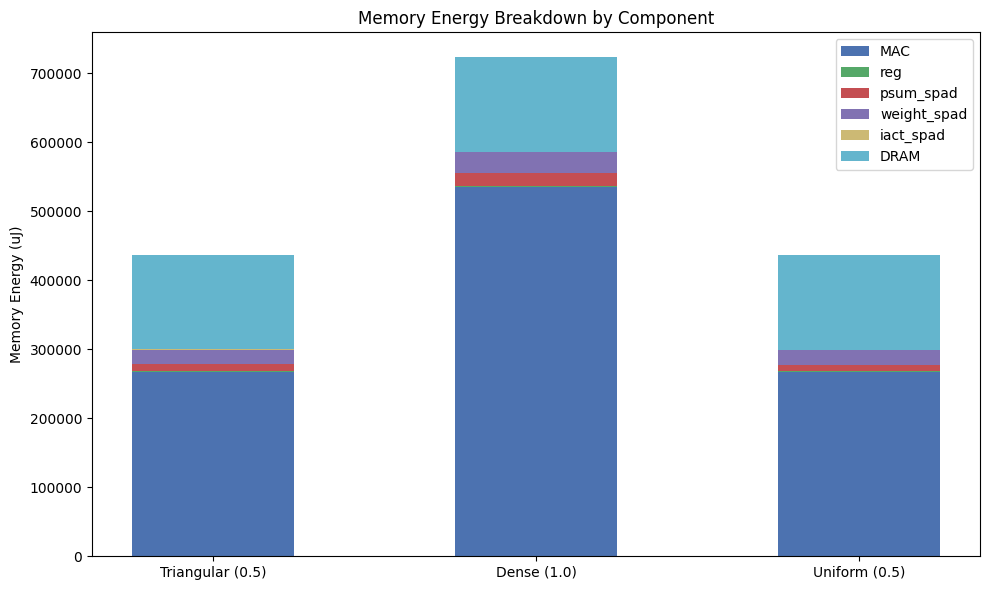

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Define memory components to include
components = ['MAC', 'reg', 'psum_spad', 'weight_spad', 'iact_spad', 'DRAM']

# Helper function to extract and convert pJ to uJ
def extract_memory_energy(stats):
    return np.array([stats['memory_energy_pJ'][comp] for comp in components]) / 1e6

attn_energy = extract_memory_energy(attn_stats)
dense_energy = extract_memory_energy(baseline_dense_stats)
sparse_energy = extract_memory_energy(baseline_50p_sparse_stats)

labels = ['Triangular (0.5)', 'Dense (1.0)', 'Uniform (0.5)']
x = np.arange(len(labels))
bar_width = 0.5
colors = ['#4c72b0', '#55a868', '#c44e52', '#8172b2', '#ccb974', '#64b5cd']

fig, ax = plt.subplots(figsize=(10, 6))
bottom = np.zeros(3)

for i, comp in enumerate(components):
    values = [attn_energy[i], dense_energy[i], sparse_energy[i]]
    ax.bar(x, values, bar_width, bottom=bottom, label=comp, color=colors[i])
    bottom += values

ax.set_ylabel('Memory Energy (uJ)')
ax.set_title('Memory Energy Breakdown by Component')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.tight_layout()
plt.show()


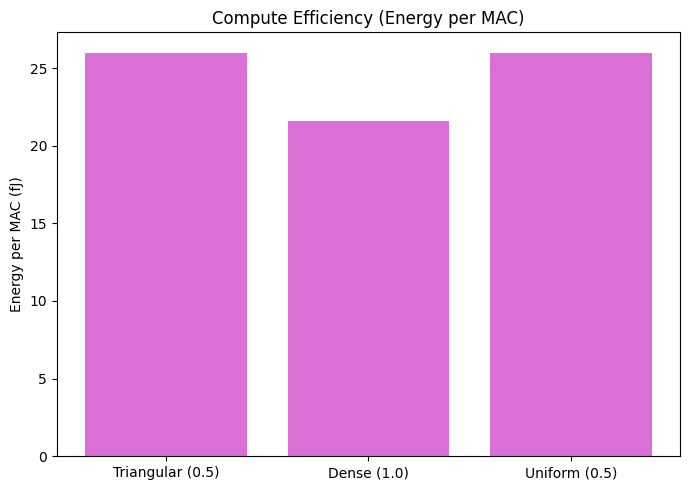

In [18]:
# Extract total energy and total MACs
total_energy_uJ = [
    attn_stats['total_energy_uJ'],
    baseline_dense_stats['total_energy_uJ'],
    baseline_50p_sparse_stats['total_energy_uJ']
]

total_macs = [
    attn_stats['total_actual_computes'],
    baseline_dense_stats['total_actual_computes'],
    baseline_50p_sparse_stats['total_actual_computes']
]

energy_per_mac_fJ = [1e6 * e / macs for e, macs in zip(total_energy_uJ, total_macs)]  # uJ to fJ

plt.figure(figsize=(7, 5))
plt.bar(labels, energy_per_mac_fJ, color='orchid')
plt.ylabel("Energy per MAC (fJ)")
plt.title("Compute Efficiency (Energy per MAC)")
plt.tight_layout()
plt.show()


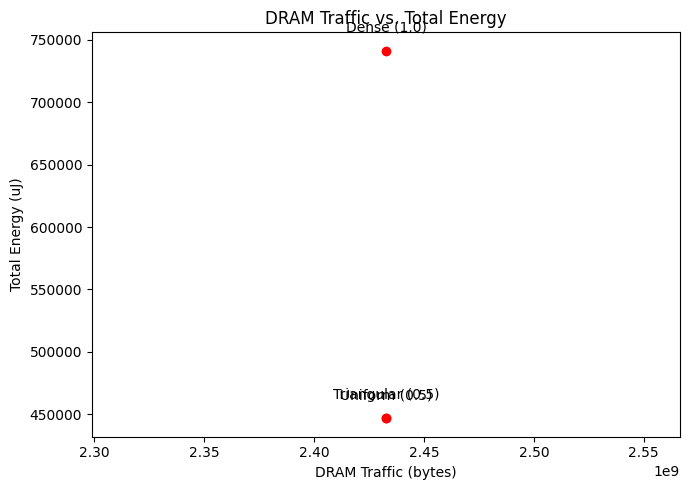

In [19]:
dram_traffic = [
    attn_stats['memory_traffic']['DRAM'],
    baseline_dense_stats['memory_traffic']['DRAM'],
    baseline_50p_sparse_stats['memory_traffic']['DRAM']
]

plt.figure(figsize=(7, 5))
plt.scatter(dram_traffic, total_energy_uJ, color='red')

for i, label in enumerate(labels):
    plt.text(dram_traffic[i], total_energy_uJ[i] + 15000, label, ha='center')

plt.xlabel("DRAM Traffic (bytes)")
plt.ylabel("Total Energy (uJ)")
plt.title("DRAM Traffic vs. Total Energy")
plt.tight_layout()
plt.show()


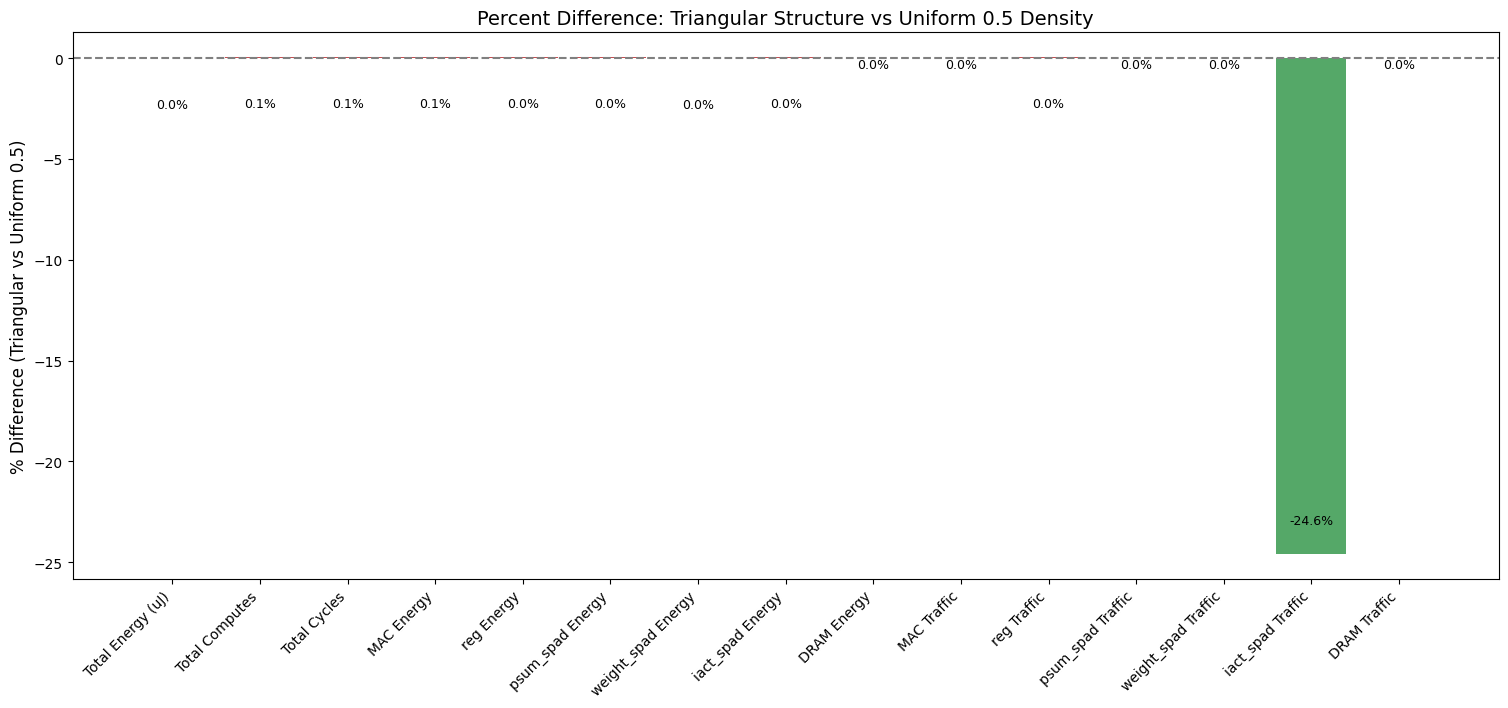

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Your data already defined:
# attn_stats, baseline_50p_sparse_stats

triangular = attn_stats
uniform = baseline_50p_sparse_stats

# Memory and traffic components to compare
components = ['MAC', 'reg', 'psum_spad', 'weight_spad', 'iact_spad', 'DRAM']

# Safe % diff
def percent_diff(a, b):
    if b == 0:
        return 0 if a == 0 else float('inf')  # handle divide-by-zero safely
    return 100 * (a - b) / b

# Top-level metrics
top_metrics = {
    'Total Energy (uJ)': percent_diff(triangular['total_energy_uJ'], uniform['total_energy_uJ']),
    'Total Computes': percent_diff(triangular['total_actual_computes'], uniform['total_actual_computes']),
    'Total Cycles': percent_diff(triangular['total_cycles'], uniform['total_cycles'])
}

# Memory energy and traffic deltas
mem_energy_diffs = {
    f'{c} Energy': percent_diff(triangular['memory_energy_pJ'][c], uniform['memory_energy_pJ'][c])
    for c in components
}

mem_traffic_diffs = {
    f'{c} Traffic': percent_diff(triangular['memory_traffic'][c], uniform['memory_traffic'][c])
    for c in components
}

# Combine all diffs
all_diffs = {**top_metrics, **mem_energy_diffs, **mem_traffic_diffs}

# Plot
labels = list(all_diffs.keys())
values = [all_diffs[k] for k in labels]

# Create the figure and axes with a larger size
plt.figure(figsize=(16, 8))

# Create the bar plot with distinct colors based on the values
bars = plt.bar(labels, values, color=['#55a868' if v < 0 else '#c44e52' for v in values])

# Add a horizontal line at y=0 for better reference
plt.axhline(0, color='gray', linestyle='--')

# Rotate the x-axis labels for better readability and avoid overlap
plt.xticks(rotation=45, ha='right', fontsize=10)

# Labeling
plt.ylabel('% Difference (Triangular vs Uniform 0.5)', fontsize=12)
plt.title('Percent Difference: Triangular Structure vs Uniform 0.5 Density', fontsize=14)

# Adjust layout to prevent clipping of labels
plt.tight_layout(pad=4)

# Add value labels below the bars
for bar, value in zip(bars, values):
    height = bar.get_height()
    label = '∞' if value == float('inf') else f'{value:.1f}%'
    plt.text(bar.get_x() + bar.get_width()/2, height - np.sign(height)*2, label, 
             ha='center', va='top', fontsize=9)

# Display the plot
plt.show()
